# Convolutional Neural Networks - MNIST Digit Recognition

## Preparations

In [6]:
## adapt this directory to your needs
base_dir = '/home/falli/bac/activity_prediction/implementation/'
model_dir = base_dir + 'models/'
data_dir = base_dir + 'data/'

In [7]:
import numpy as np
import tensorflow as tf

from pyMLaux import plot_history, read_MNIST, show_img_data,  show_img, evaluate_classification_result, create_data_from_testimage

In [8]:
tf.get_logger().setLevel('ERROR')

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2024-02-28 14:27:55.648642: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-28 14:27:55.648894: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-28 14:27:55.648989: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-28 14:27:55.649346: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-28 14:27:55.649372: I tensorflow/core/common_runtime/gpu/gpu

In [9]:
train_y, train_x = read_MNIST('train', path=data_dir)
test_y, test_x = read_MNIST('test', path=data_dir)


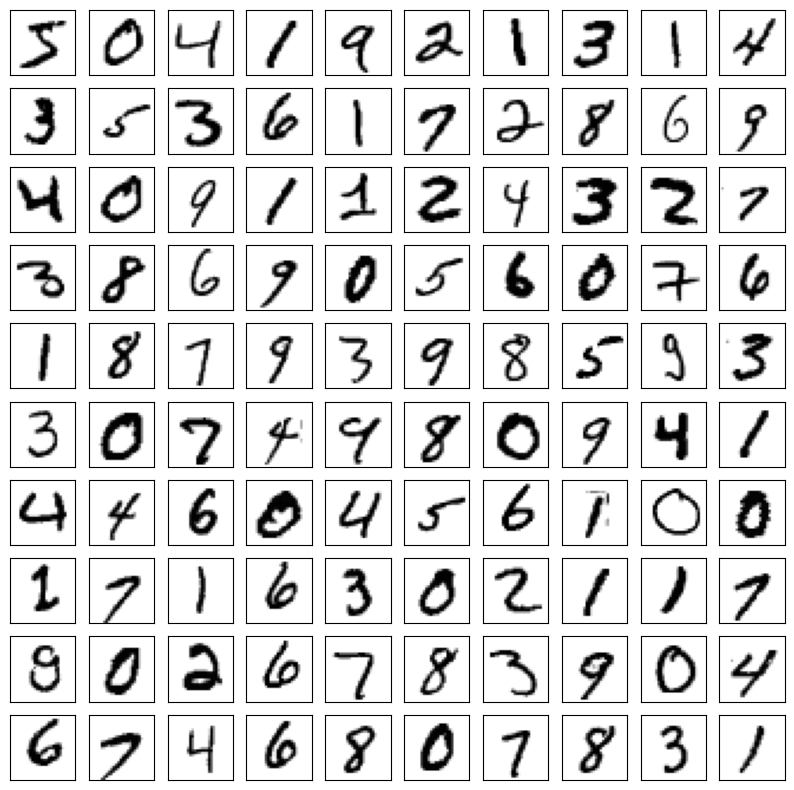

In [10]:
show_img_data(train_x, no=100, layout=(10, 10), interpolation=None)

## Create Model

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(train_x.shape[1], train_x.shape[2], train_x.shape[3]), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

2024-02-28 14:28:02.844721: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-28 14:28:02.844940: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-28 14:28:02.845009: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-28 14:28:02.845310: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-28 14:28:02.845446: I external/local_xla/xla/stream_executor

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                   

In [13]:
#more convolutions
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(train_x.shape[1], train_x.shape[2], train_x.shape[3]), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 64)         

In [14]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(train_x.shape[1], train_x.shape[2], train_x.shape[3]), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                589888    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                      

In [15]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(train_x.shape[1], train_x.shape[2], train_x.shape[3]), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 64)          36928     
                                                      

In [16]:
model5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(train_x.shape[1], train_x.shape[2], train_x.shape[3]), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 5, 5, 64)         


## Train Model

In [17]:
history = model.fit(x=train_x, y=train_y, epochs=25, batch_size=32, validation_split=0.1)

Epoch 1/25


2024-02-28 14:28:11.566306: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-28 14:28:11.948082: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-28 14:28:12.689527: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-28 14:28:13.927890: I external/local_xla/xla/service/service.cc:168] XLA service 0x557d9d4f3630 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-28 14:28:13.927962: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2024-02-28 14:28:13.948977: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709126894.121776    3990 device_compil

1688/1688 [==============================] - 28s 13ms/step - loss: 0.3006 - accuracy: 0.9035 - val_loss: 0.0450 - val_accuracy: 0.9863
Epoch 2/25
1688/1688 [==============================] - 23s 13ms/step - loss: 0.0997 - accuracy: 0.9719 - val_loss: 0.0403 - val_accuracy: 0.9883
Epoch 3/25
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0721 - accuracy: 0.9787 - val_loss: 0.0330 - val_accuracy: 0.9905
Epoch 4/25
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0577 - accuracy: 0.9835 - val_loss: 0.0286 - val_accuracy: 0.9918
Epoch 5/25
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0494 - accuracy: 0.9855 - val_loss: 0.0285 - val_accuracy: 0.9920
Epoch 6/25
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0444 - accuracy: 0.9872 - val_loss: 0.0274 - val_accuracy: 0.9923
Epoch 7/25
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0375 - accuracy: 0.9889 - val_loss: 0.0318 - val_accura

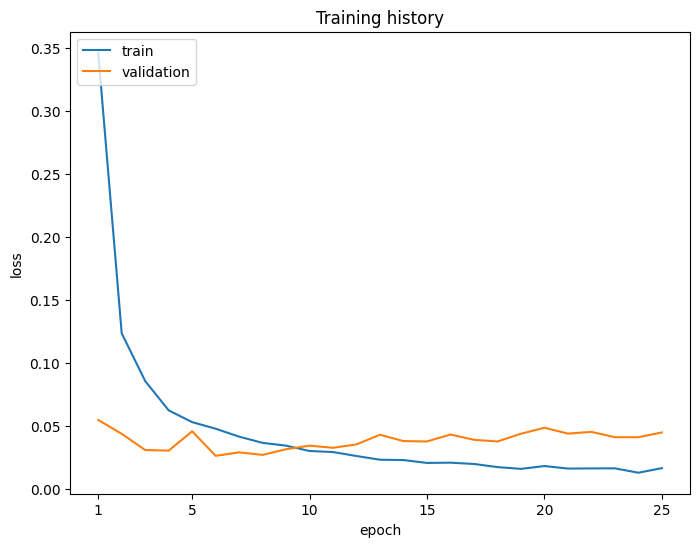

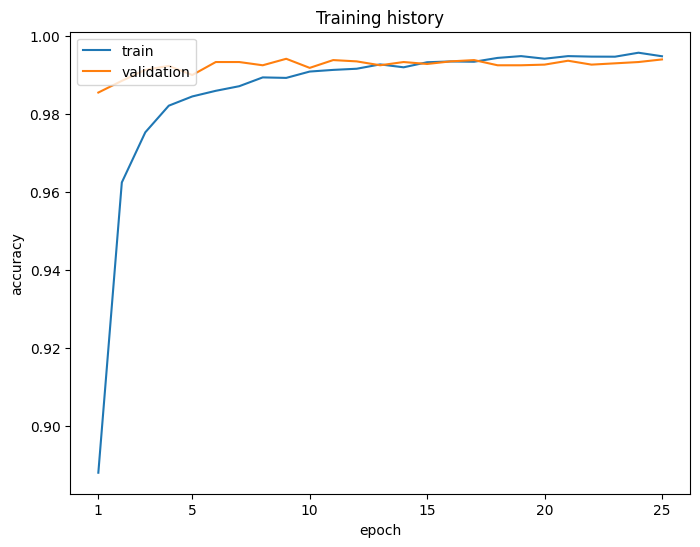

In [47]:
plot_history(history)

In [48]:
model.save(model_dir + '/m1/Fallmann_Lukas.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
history2 = model2.fit(x=train_x, y=train_y, epochs=25, batch_size=32, validation_split=0.1)

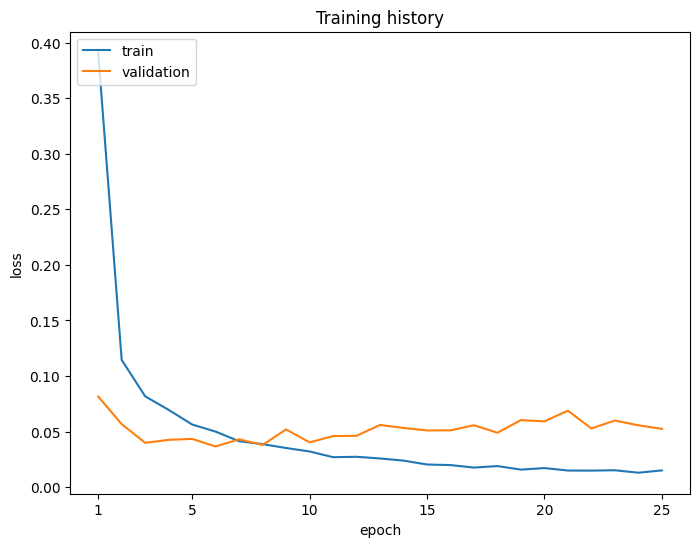

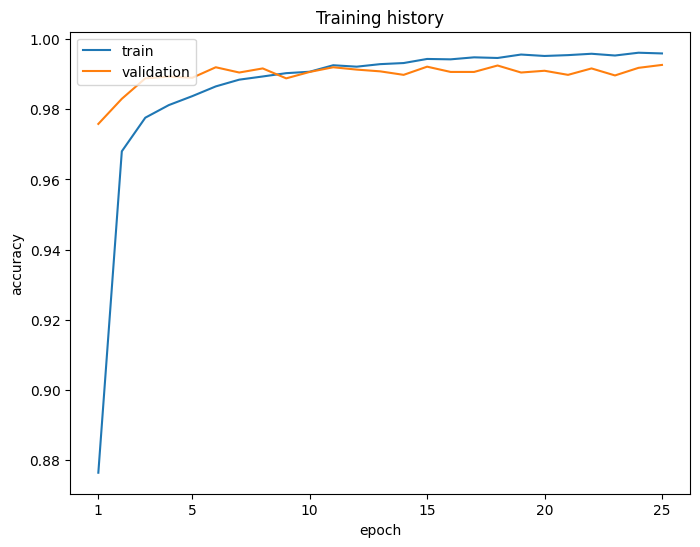

In [50]:
plot_history(history2)

In [51]:
model2.save(model_dir + '/m2/Fallmann_Lukas.hdf5')

In [52]:
history3 = model3.fit(x=train_x, y=train_y, epochs=25, batch_size=32, validation_split=0.1)

Epoch 1/25
1688/1688 [==============================] - 10s 5ms/step - loss: 0.3023 - accuracy: 0.9085 - val_loss: 0.0581 - val_accuracy: 0.9838
Epoch 2/25
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1354 - accuracy: 0.9588 - val_loss: 0.0547 - val_accuracy: 0.9860
Epoch 3/25
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1038 - accuracy: 0.9686 - val_loss: 0.0428 - val_accuracy: 0.9885
Epoch 4/25
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0819 - accuracy: 0.9749 - val_loss: 0.0428 - val_accuracy: 0.9895
Epoch 5/25
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0663 - accuracy: 0.9796 - val_loss: 0.0369 - val_accuracy: 0.9902
Epoch 6/25
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0607 - accuracy: 0.9810 - val_loss: 0.0364 - val_accuracy: 0.9913
Epoch 7/25
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0512 - accuracy: 0.9838 - val_loss: 0.0445 - val_accuracy

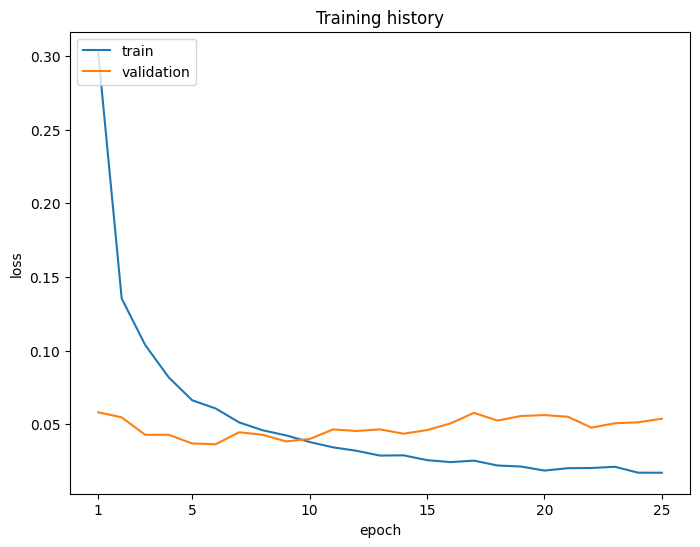

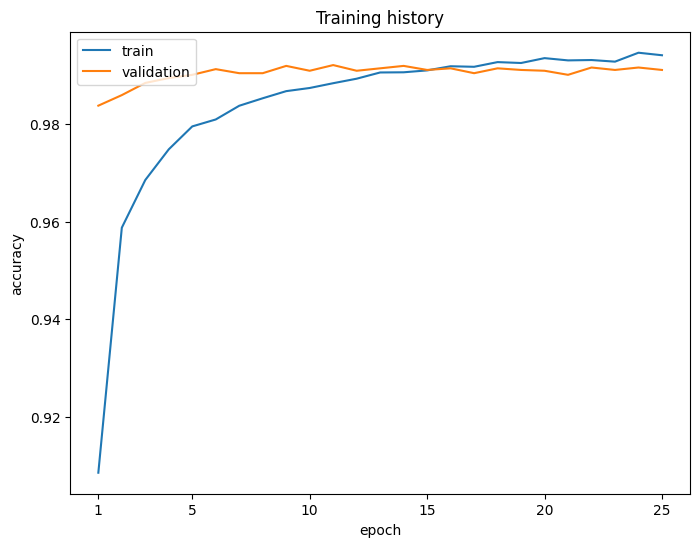

In [53]:
plot_history(history3)

In [54]:
model3.save(model_dir + '/m3/Fallmann_Lukas.hdf5')

In [55]:
history4 = model4.fit(x=train_x, y=train_y, epochs=25, batch_size=32, validation_split=0.1)

Epoch 1/25
1688/1688 [==============================] - 12s 6ms/step - loss: 0.4054 - accuracy: 0.8687 - val_loss: 0.0583 - val_accuracy: 0.9845
Epoch 2/25
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1352 - accuracy: 0.9612 - val_loss: 0.0331 - val_accuracy: 0.9900
Epoch 3/25
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1130 - accuracy: 0.9681 - val_loss: 0.0334 - val_accuracy: 0.9900
Epoch 4/25
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0927 - accuracy: 0.9738 - val_loss: 0.0264 - val_accuracy: 0.9918
Epoch 5/25
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0824 - accuracy: 0.9765 - val_loss: 0.0244 - val_accuracy: 0.9935
Epoch 6/25
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0800 - accuracy: 0.9781 - val_loss: 0.0251 - val_accuracy: 0.9925
Epoch 7/25
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0742 - accuracy: 0.9790 - val_loss: 0.0236 - val_ac

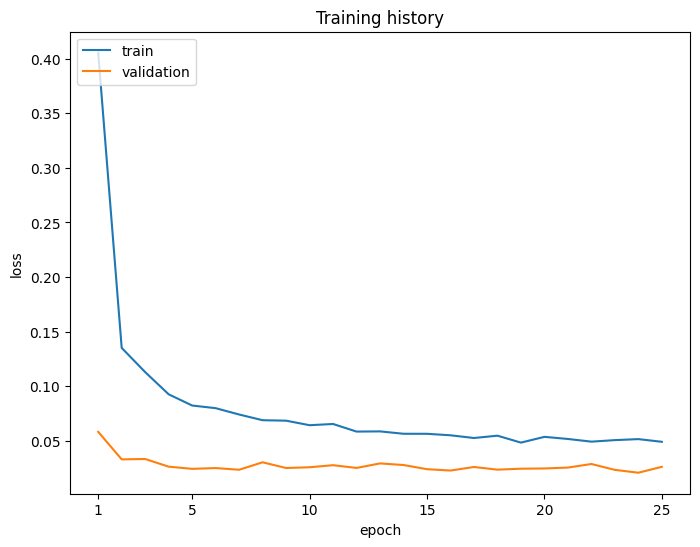

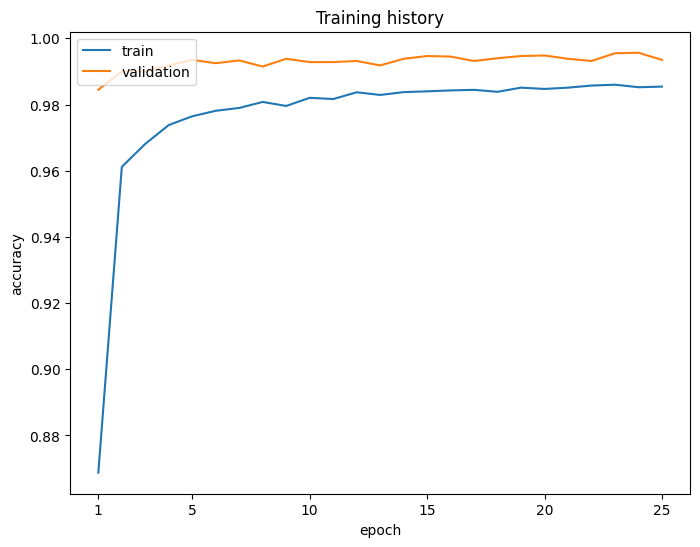

In [56]:
plot_history(history4)

In [57]:
model4.save(model_dir + '/m4/Fallmann_Lukas.hdf5')

In [58]:
history5 = model5.fit(x=train_x, y=train_y, epochs=25, batch_size=32, validation_split=0.1)

Epoch 1/25
1688/1688 [==============================] - 10s 5ms/step - loss: 0.5095 - accuracy: 0.8316 - val_loss: 0.0643 - val_accuracy: 0.9792
Epoch 2/25
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1848 - accuracy: 0.9462 - val_loss: 0.0450 - val_accuracy: 0.9862
Epoch 3/25
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1447 - accuracy: 0.9574 - val_loss: 0.0393 - val_accuracy: 0.9880
Epoch 4/25
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1283 - accuracy: 0.9624 - val_loss: 0.0378 - val_accuracy: 0.9885
Epoch 5/25
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1155 - accuracy: 0.9663 - val_loss: 0.0369 - val_accuracy: 0.9893
Epoch 6/25
1688/1688 [==============================] - 8s 4ms/step - loss: 0.1100 - accuracy: 0.9676 - val_loss: 0.0318 - val_accuracy: 0.9908
Epoch 7/25
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1053 - accuracy: 0.9692 - val_loss: 0.0316 - val_accuracy

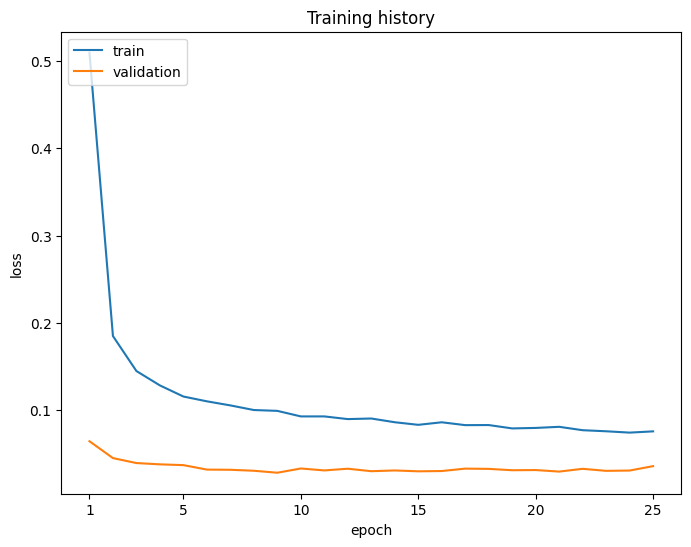

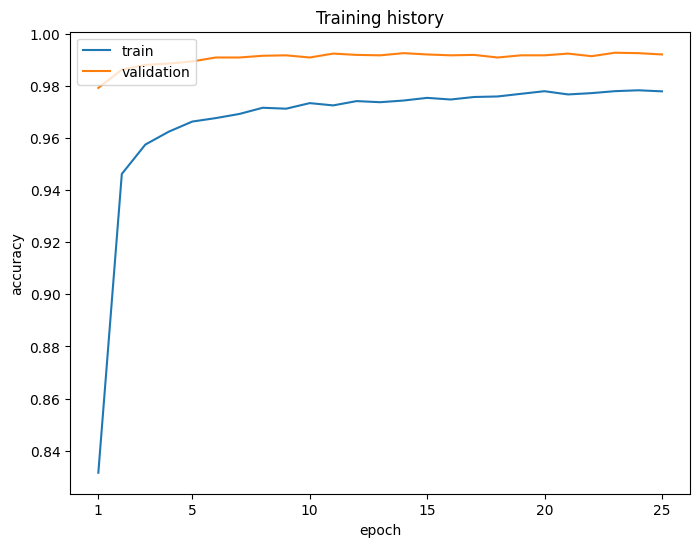

In [59]:
plot_history(history5)

In [60]:
model5.save(model_dir + '/m5/Fallmann_Lukas.hdf5')

## Evaluate on Test Data

In [61]:
pred = model.predict(test_x)

313/313 [==============================] - 1s 3ms/step


In [62]:
evaluate_classification_result(test_y, pred);

[[ 977    0    0    0    0    0    2    1    0    0]
 [   0 1134    0    0    0    0    0    1    0    0]
 [   1    1 1026    0    0    0    0    4    0    0]
 [   0    0    1 1005    0    3    0    0    1    0]
 [   0    0    0    0  980    0    0    0    0    2]
 [   0    0    0    4    0  886    1    1    0    0]
 [   3    3    0    0    0    1  949    0    2    0]
 [   0    6    3    0    0    0    0 1019    0    0]
 [   1    0    2    0    0    1    0    0  969    1]
 [   0    0    0    0    7    0    0    1    4  997]]


Class 0:
    Sensitivity (TPR):  99.694% (977 of 980)
    Specificity (TNR):  99.945% (9015 of 9020)
    Precision:          99.491% (977 of 982)
    Neg. pred. value:   99.967% (9015 of 9018)
Class 1:
    Sensitivity (TPR):  99.912% (1134 of 1135)
    Specificity (TNR):  99.887% (8855 of 8865)
    Precision:          99.126% (1134 of 1144)
    Neg. pred. value:   99.989% (8855 of 8856)
Class 2:
    Sensitivity (TPR):  99.419% (1026 of 1032)
    Specificity (TNR)

## Try on Self-made Data

In [73]:
mytest_x, mytest_y, warped_img = create_data_from_testimage(data_dir + 'fallmannNumbers2.jpg', thicken=1)

(2800, 2000)


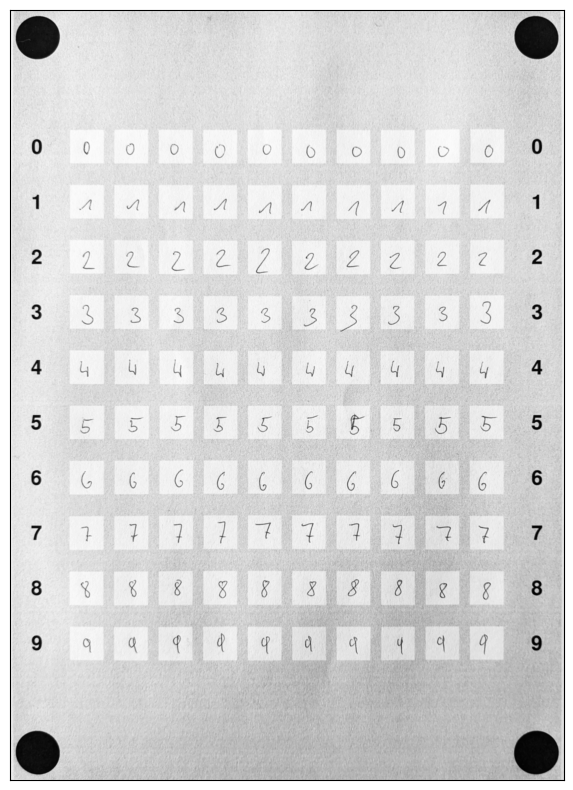

In [74]:
show_img(warped_img)

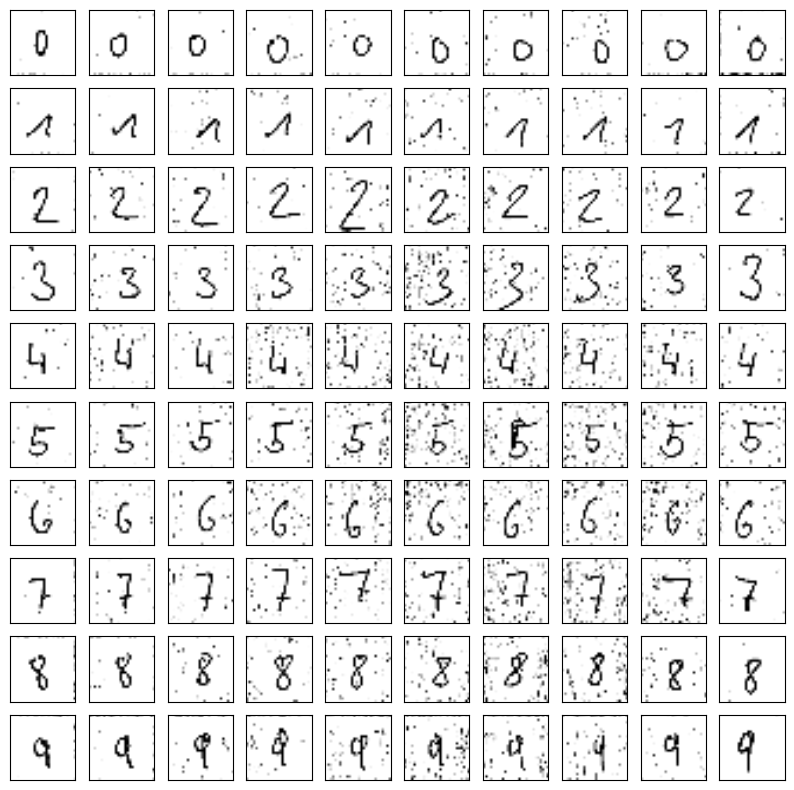

In [75]:
show_img_data(mytest_x, no=100, layout=(10, 10))

In [76]:
pred = model.predict(mytest_x)

4/4 [==============================] - 0s 3ms/step


In [77]:
evaluate_classification_result(mytest_y, pred);

[[ 3  0  0  0  0  0  6  0  0  1]
 [ 0  3  1  0  0  1  4  1  0  0]
 [ 0  1  9  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  2  0  0  0  0]
 [ 0  1  0  0  8  0  1  0  0  0]
 [ 0  0  0  0  0  9  0  0  1  0]
 [ 2  1  0  0  0  0  6  0  1  0]
 [ 0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  1  1  0  0  0  8]]


Class 0:
    Sensitivity (TPR):  30.000% (3 of 10)
    Specificity (TNR):  97.778% (88 of 90)
    Precision:          60.000% (3 of 5)
    Neg. pred. value:   92.632% (88 of 95)
Class 1:
    Sensitivity (TPR):  30.000% (3 of 10)
    Specificity (TNR):  96.667% (87 of 90)
    Precision:          50.000% (3 of 6)
    Neg. pred. value:   92.553% (87 of 94)
Class 2:
    Sensitivity (TPR):  90.000% (9 of 10)
    Specificity (TNR):  98.889% (89 of 90)
    Precision:          90.000% (9 of 10)
    Neg. pred. value:   98.889% (89 of 90)
Class 3:
    Sensitivity (TPR):  80.000% (8 of 10)
    Specificity (TNR): 100.000% (90 of 90)
    Precision:         100.000% (8 of 

In [78]:
np.save(data_dir + 'Fallmann_Lukas', mytest_x)

| Model | Description | Accuracy|
|-------|-------------|---------|
|NR.1|average conv|99.40%|
|NR.2|increase convolutions|99.27%|
|NR.3|minimal convolutions|99.12%|
|NR.4|more dropouts|99.35%|
|NR.5|increased convolutions again|99.20%|

The best results were scored with and average amount of convolutions.

In [4]:
!cd $notebook_dir; jupyter nbconvert --to html Ex7_Fallmann.ipynb

[NbConvertApp] Converting notebook Ex7_Fallmann.ipynb to html
[NbConvertApp] Writing 2214893 bytes to Ex7_Fallmann.html
